## T-SNE 2D-visualization of Data Distributions

Images are randomly picked from given datasets, which will be embedded into 2d-space for visualization.

### a. Preprocessing data list

In [23]:
import os
import random
import numpy as np
import cv2
from tqdm import tqdm
import sklearn
from sklearn.manifold import TSNE 
from sklearn.datasets import load_digits # For the UCI ML handwritten digits dataset
from funcs.draw import plot_tsne
import matplotlib
%matplotlib inline

nums = 300
parent_dirs = ['SDUMLA', 'MMCBNU', 'FVUSM', 'HKPU', 'UTFVP']
# child_dirs = ['SDUMLA']
root = '/home/ubuntu/work/data'
child_dirs = ['roi', 'equ', 'aug', 'seg']
# parent_dirs = ['aug-0', 'aug-1', 'aug-2', 'aug-3']
titles = ['Raw', 'Equalized', 'Augmented', 'Mapped']

lists = []
labels_list = []
for p_dir in parent_dirs:
    file_list = []
    labels = []
    for ind, c_dir in enumerate(child_dirs):
        path = os.sep.join([root, p_dir, c_dir])
        files = [os.path.join(path, i) for i in os.listdir(path)]
        random.shuffle(files)
        files = files[:nums]
        file_list += files
        labels += list((np.ones(len(files)) * (ind)).astype(int))
#         print(ind)
    #     names += db[ind]
#         print(files)
    lists.append(file_list)
#     labels_list.append(labels)

In [25]:
lists[3][0]

'/home/ubuntu/work/data/HKPU/roi/018_f2_5_s1.bmp'

### b. Embedding finger-vein images to 2d-space

In [4]:
image_type = '.bmp'
target_size = [30, 75] # height, width
arr_list = []
trim = 8
for file_list in lists:
    arrs = []
    for file in tqdm(file_list):
        im = cv2.imread(file, 0)
        # trim image margins
        im[:trim, :] = 0; im[:, :trim] = 0
        im[:trim, :] = 0; im[:, :trim] = 0
        im[-trim:, :] = 0; im[:, -trim:] = 0
        im = cv2.resize(im, (target_size[1], target_size[0]))
        im = np.reshape(im, -1)
        arrs.append(im)
    arr_list.append(np.array(arrs))

100%|██████████| 1500/1500 [00:34<00:00, 43.91it/s] 


In [5]:
from sklearn.manifold import TSNE

digits_final = []
for arrs in tqdm(arr_list):
    X = arrs
    tmp = TSNE(perplexity=30).fit_transform(X)
    digits_final.append(tmp)
a = np.array(digits_final)
# np.save('TSNE_digits_final.npy',a)
#     print('Done')

100%|██████████| 4/4 [00:20<00:00,  5.09s/it]


In [8]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

#Play around with varying the parameters like perplexity, random_state to get different plots
def plot_tsne(x, colors, annotate=True):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure()
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=10, alpha=0.5, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(5):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        if annotate:
            txt = ax.text(xtext, ytext, db[i], fontsize=20)
            txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
            txts.append(txt)
    return f, ax, txts

In [17]:
digits_final[4].shape

IndexError: list index out of range

### c. Visualize results

ValueError: 'c' argument has 1500 elements, which is inconsistent with 'x' and 'y' with size 1499.

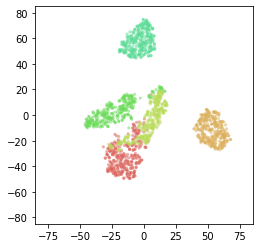

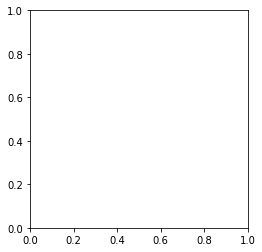

In [9]:
for ind, final in enumerate(digits_final):
    f, ax, _ = plot_tsne(final, np.array(labels), annotate=False)
#     ax.set_title(names[ind])
#     ax.set_aspect('equal')
    ax.set_ylim([-85, 85])
    ax.set_xlim([-85, 85])
#     f.savefig(f'draw/TSNE-{targets[ind]}.pdf', bbox_inches='tight', dpi=300)